Projeto Ciência de Dados

Perguntas 

1 - Qual é a distribuição de salários entre diferentes níveis de experiência ao longo dos anos?

2 - Como a proporção de trabalho remoto (remote_ratio) afeta os salários médios em USD (salaryinusd) para diferentes níveis de experiência (experience_level)?


In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [3]:
base = pd.read_csv('ds_salaries.csv')
print(base.head())
print(base.shape)

   work_year experience_level employment_type                 job_title  \
0       2023               SE              FT  Principal Data Scientist   
1       2023               MI              CT               ML Engineer   
2       2023               MI              CT               ML Engineer   
3       2023               SE              FT            Data Scientist   
4       2023               SE              FT            Data Scientist   

   salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0   80000             EUR          85847                 ES           100   
1   30000             USD          30000                 US           100   
2   25500             USD          25500                 US           100   
3  175000             USD         175000                 CA           100   
4  120000             USD         120000                 CA           100   

  company_location company_size  
0               ES            L  
1               US

In [4]:
base.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [16]:
base.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

1 - Qual é a distribuição de salários entre diferentes níveis de experiência ao longo dos anos?

In [12]:
base['experience_level'].value_counts()

experience_level
SE    2516
MI     805
EN     320
EX     114
Name: count, dtype: int64

In [19]:
base['work_year'].value_counts()

work_year
2023    1785
2022    1664
2021     230
2020      76
Name: count, dtype: int64

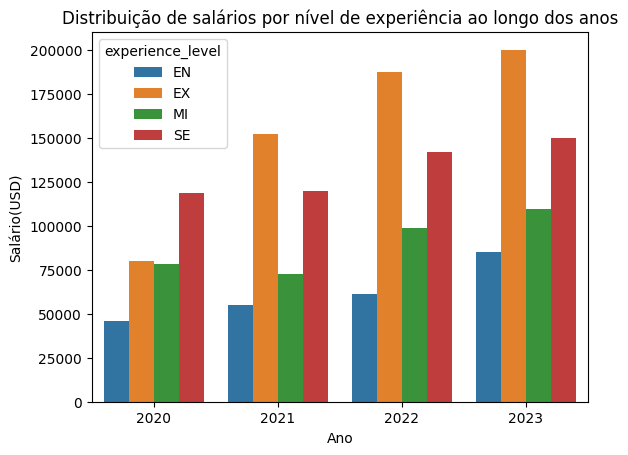

In [20]:
salario_experiencia_ano = base.groupby(['work_year', 'experience_level'])['salary_in_usd'].median().reset_index()
sns.barplot(x='work_year', y='salary_in_usd', hue='experience_level', data=salario_experiencia_ano)
plt.title('Distribuição de salários por nível de experiência ao longo dos anos')
plt.xlabel('Ano')
plt.ylabel('Salário(USD)')
plt.show()

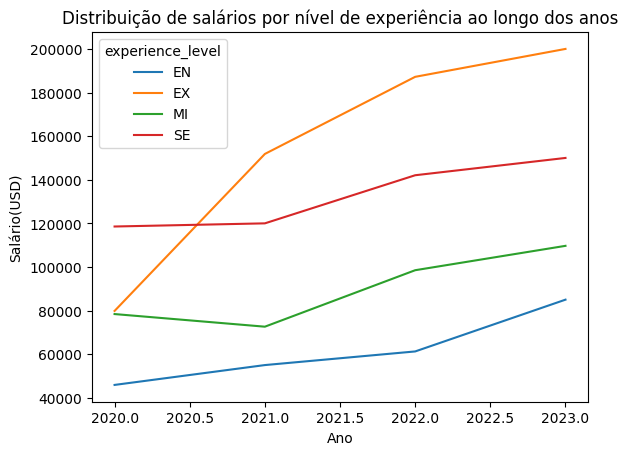

In [25]:
salario_experiencia_ano = base.groupby(['work_year', 'experience_level'])['salary_in_usd'].median().reset_index()
sns.lineplot(x='work_year', y='salary_in_usd', hue='experience_level', data=salario_experiencia_ano)
plt.title('Distribuição de salários por nível de experiência ao longo dos anos')
plt.xlabel('Ano')
plt.ylabel('Salário(USD)')
plt.show()

2 - Como a proporção de trabalho remoto (remote_ratio) afeta os salários médios em USD (salaryinusd) para diferentes níveis de experiência (experience_level)?

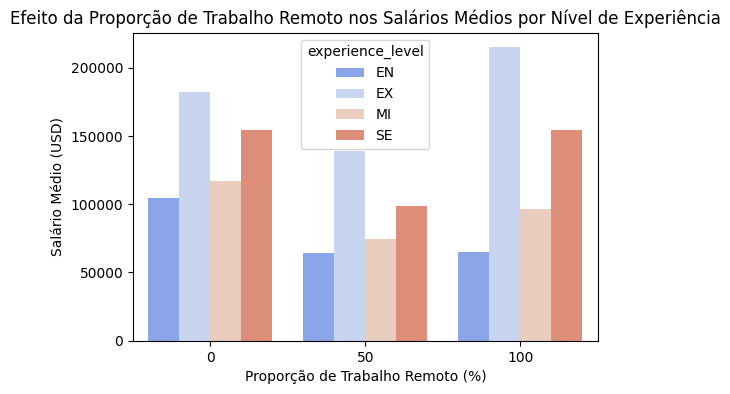

In [34]:
base_grouped = base.groupby(['remote_ratio', 'experience_level'])['salary_in_usd'].mean().reset_index()
plt.figure(figsize=(6, 4))
sns.barplot(x='remote_ratio', y='salary_in_usd', hue='experience_level', data=base_grouped, palette='coolwarm')
plt.title('Efeito da Proporção de Trabalho Remoto nos Salários Médios por Nível de Experiência')
plt.xlabel('Proporção de Trabalho Remoto (%)')
plt.ylabel('Salário Médio (USD)')
plt.show()

In [37]:
base_encoded = pd.get_dummies(base, drop_first=True)

X = base_encoded.drop(columns=['salary_in_usd'])  
y = base_encoded['salary_in_usd']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Absolute Error (MAE): 1270.2934354194408
Root Mean Squared Error (RMSE): 8277.602700993119
